
# Laboratorio: Red Neuronal con MNIST  
**Curso:** Machine Learning  
**Total puntos:** 10

**Objetivo:** Implementar una red neuronal simple para clasificar dígitos escritos a mano del conjunto de datos MNIST utilizando Python y Keras.



## Paso 1: Cargar el conjunto de datos MNIST (1 punto)

Ejecuta el siguiente bloque para descargar y explorar el conjunto de datos.


In [8]:
#%pip install tensorflow

from tensorflow.keras.datasets import mnist

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de test:", x_test.shape)


Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de test: (10000, 28, 28)



## Paso 2: Visualizar ejemplos del dataset (1 punto)

✏️ **Slot para completar:** Visualiza al menos 5 imágenes con sus etiquetas utilizando `matplotlib.pyplot.imshow()`.


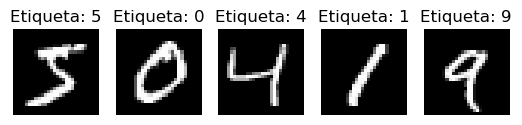

In [9]:
import matplotlib.pyplot as plt

# Visualizar 5 imágenes con sus etiquetas
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')

plt.show()


## Paso 3: Preprocesamiento (1 punto)

✏️ **Slot para completar:** 
- Normaliza las imágenes (divide por 255.0).
- Aplana cada imagen a un vector de 784 valores.
- Codifica las etiquetas con `to_categorical`.


In [10]:
from tensorflow.keras.utils import to_categorical

# Normalizar
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)



## Paso 4: Definir la red neuronal (2 puntos)

✏️ **Slot para completar:** 
- Crea un modelo `Sequential`.
- Agrega una capa oculta con activación ReLU.
- Agrega una capa de salida con activación Softmax.
- Compila el modelo con `adam` y `categorical_crossentropy`.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definición del modelo
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

# Compilación
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])




## Paso 5: Entrenar el modelo (1 punto)

✏️ **Slot para completar:** Entrena el modelo con `fit` durante 5 épocas y batch size 32.


In [12]:
# Entrenar el modelo
model.fit(x_train, y_train_cat, epochs=5, batch_size=32)



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8811 - loss: 0.4202
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9664 - loss: 0.1142
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9769 - loss: 0.0760
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9843 - loss: 0.0524
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9875 - loss: 0.0435



## Paso 6: Evaluar el modelo (1 punto)

✏️ **Slot para completar:** Evalúa el modelo con `evaluate()` en el conjunto de prueba.


In [ ]:
# Evaluar el modelo
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9739 - loss: 0.0818
Loss: 0.0729, Accuracy: 0.9773


## Preguntas de Reflexión (3 puntos en total)

### 1. ¿Qué ventaja observas al usar codificación one-hot para las etiquetas? (0.5 punto)

Permite que la red neuronal trate cada clase de manera independiente y que la salida sea compatible con funciones como categorical_crossentropy.

### 2. ¿Qué ocurre si aumentas o disminuyes el número de neuronas ocultas? (0.5 punto)

Si se aumentan el número de neuronas se puede capturar relaciones más complejas, pero aumentan el riesgo de sobreajuste. Si de disminuyen las neuronas se puede simplificar el modelo, pero podrían limitar su capacidad de aprendizaje.

### 3. ¿Qué alternativa propondrías al optimizador `adam` y por qué? (0.5 punto)

Podría usarse SGD con momentum, ya que puede ofrecer un mejor control sobre el proceso de optimización y a veces generaliza mejor.

### 4. ¿Cómo cambia el desempeño si entrenas más épocas? ¿Cuál es el riesgo? (0.5 punto)

Puede mejorar la precisión hasta cierto punto, pero muchas épocas pueden causar sobreajuste, ya que el modelo aprende demasiado bien el conjunto de entrenamiento y falla en generalizar.

### 5. ¿Por qué es importante dividir en conjuntos de entrenamiento y prueba? (1 punto)

Para medir el desempeño real del modelo en datos que no conoce. Esto evita que el modelo se evalúe sobre los mismos datos que usó para aprender, lo que daría una estimación sesgada.